In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models.ldamulticore import LdaMulticore

from gensim.models import Phrases
from gensim.parsing.preprocessing import preprocess_string, remove_stopwords, strip_numeric, strip_punctuation, strip_short, stem_text
from gensim.test.utils import common_corpus
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../')
from util import load_data, load_gensim_data

In [3]:
YEARS = (2012, 2016)
corpus, id2word = load_gensim_data(YEARS, path='../../Files/gensim/')

In [ ]:
params = {
    'num_topics': 30,
    'chunksize': 2000,
    'passes': 20,
    'iterations': 400,
    'eval_every': None,
    'alpha': 'symmetric',
    'eta': 'auto'
}

In [ ]:
models = {}
for item in corpus:
    models[item] = LdaMulticore(
        corpus=corpus[item],
        id2word=id2word[item],
        workers=32,
        **params
    )
    print(f'Finished training {item} model')

In [7]:
# models['item1a'].print_topics(num_topics=5, num_words=5)
# models['item7'].print_topics(num_topics=5, num_words=5)
print(models['1a'].show_topics(num_topics=5, num_words=5, formatted=True))

# Look at things your throwing out in filtering
# Look at strange occurences "duke"
# Look at total perecent of words that are made up
# Split by sector

[(23, '0.056*"mine" + 0.021*"miner" + 0.020*"metal" + 0.018*"gold" + 0.012*"explor"'), (4, '0.010*"award" + 0.009*"separ" + 0.008*"spin" + 0.008*"contractor" + 0.008*"defens"'), (25, '0.017*"raw" + 0.016*"raw_materi" + 0.010*"pension" + 0.009*"coal" + 0.008*"transport"'), (12, '0.082*"hotel" + 0.024*"reit" + 0.020*"travel" + 0.014*"sharehold" + 0.011*"brand"'), (18, '0.024*"fda" + 0.022*"devic" + 0.019*"patent" + 0.018*"medic" + 0.013*"reimburs"')]


In [ ]:
for model_name in models:
    model[model_name].save(f'./{YEARS[0]}-{YEARS[1]}_{model_name}.gnsm')

### Restore models from file

In [4]:
models = {
    '1a': None,
    '7': None
}

for model_name in models:
    models[model_name] = LdaMulticore.load(f'../../models/{YEARS[0]}-{YEARS[1]}_{model_name}.gnsm')

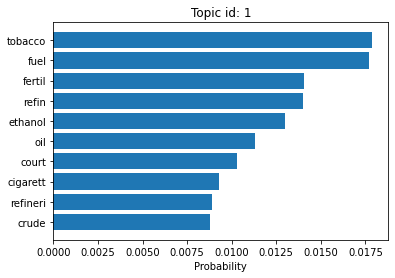

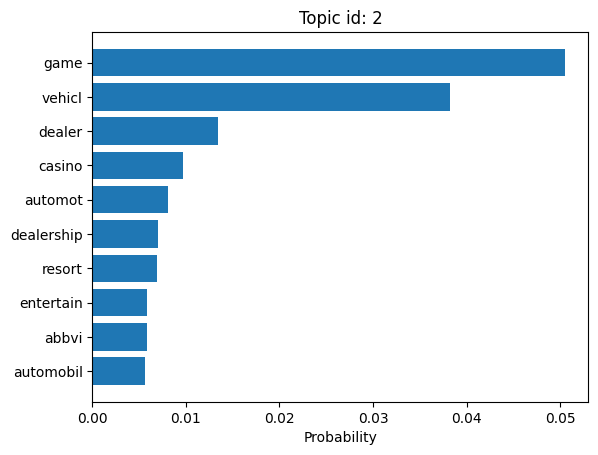

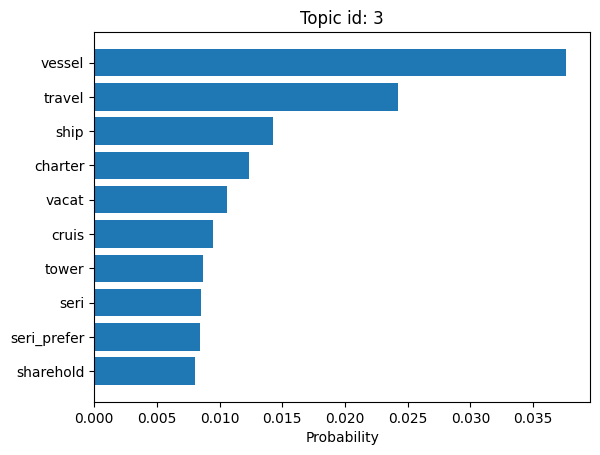

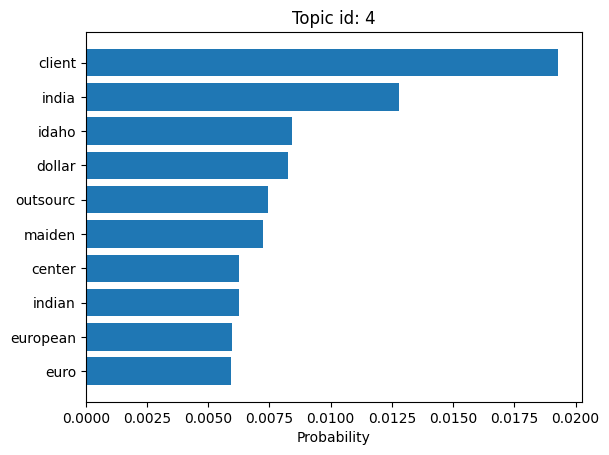

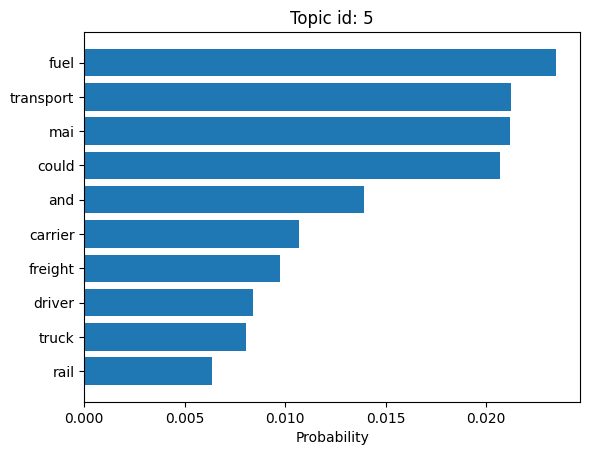

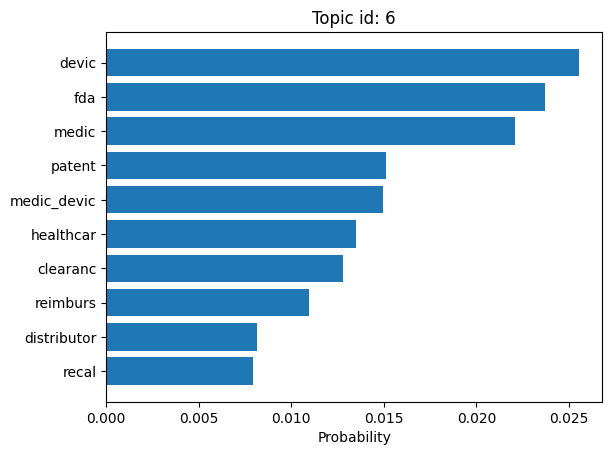

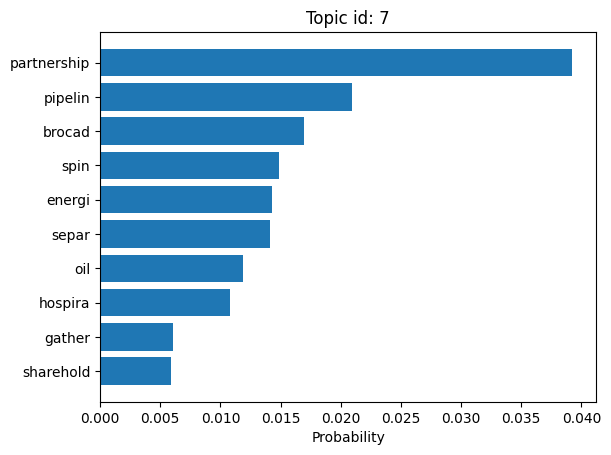

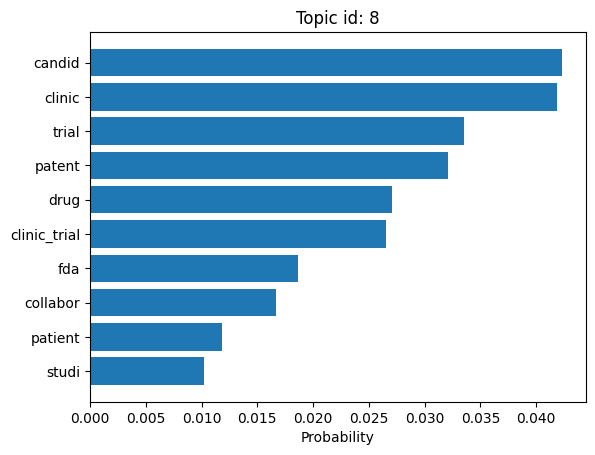

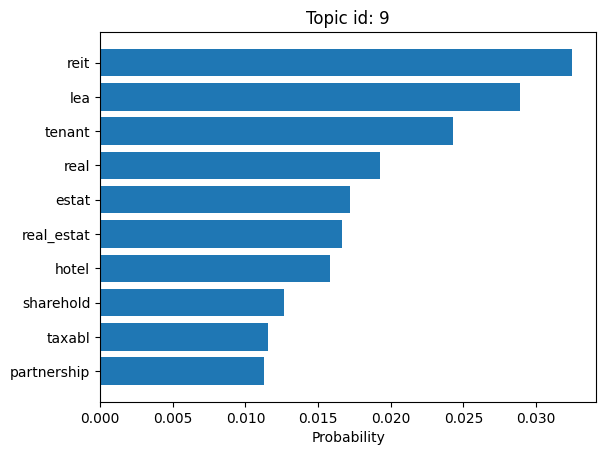

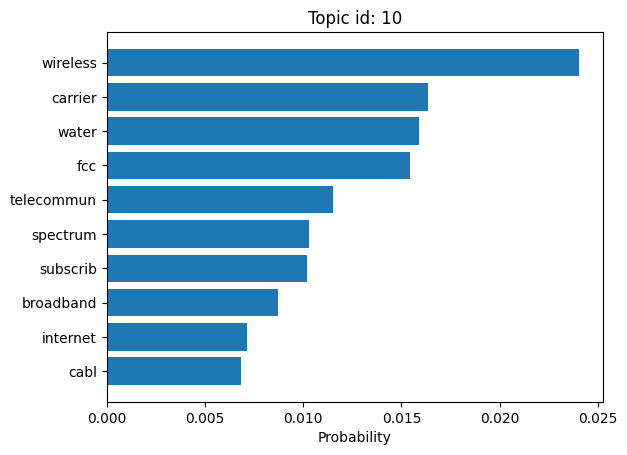

In [5]:
from util import plot_topics
        
plot_topics(models['1a'], num_topics=10, topn=10)

# Look into hospira and brocad for topic 7
# DIVIDE BY SECTOR
# Look into more risk factor focused topics
# Stemming might be taking off too much

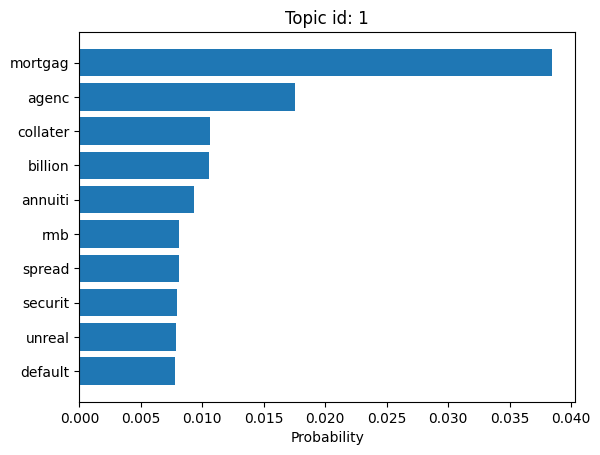

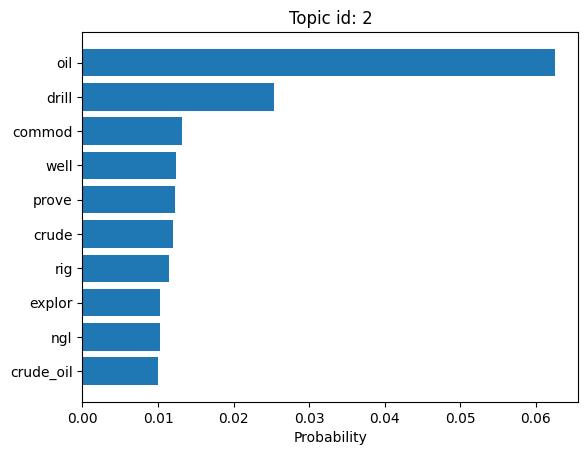

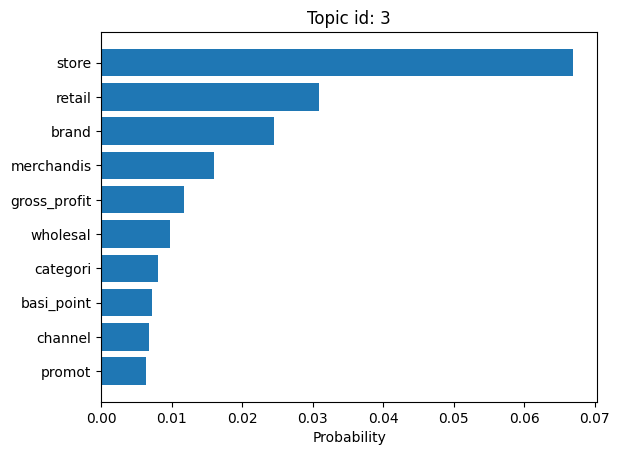

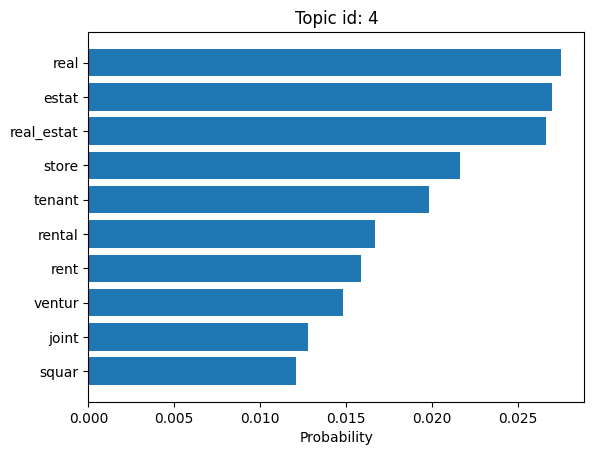

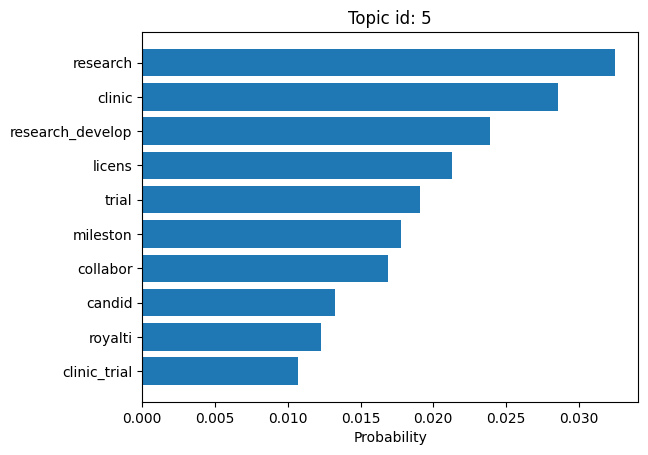

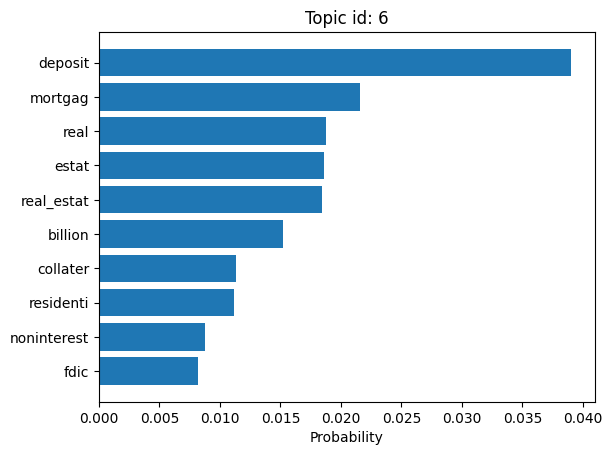

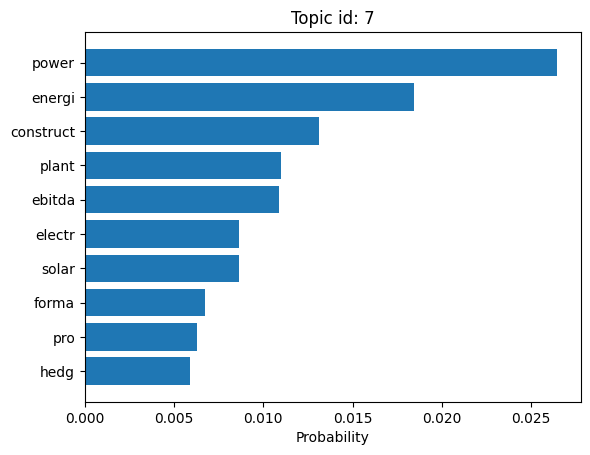

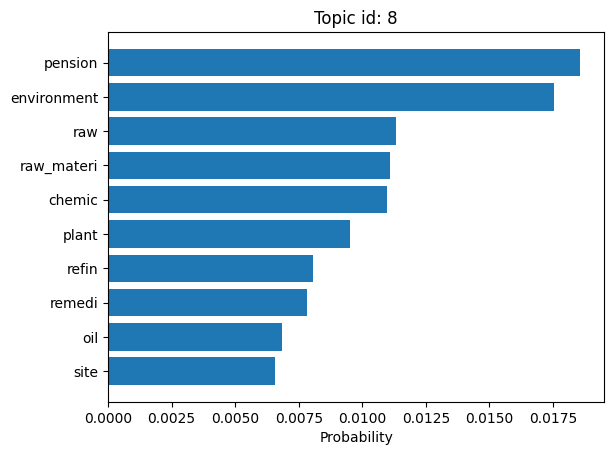

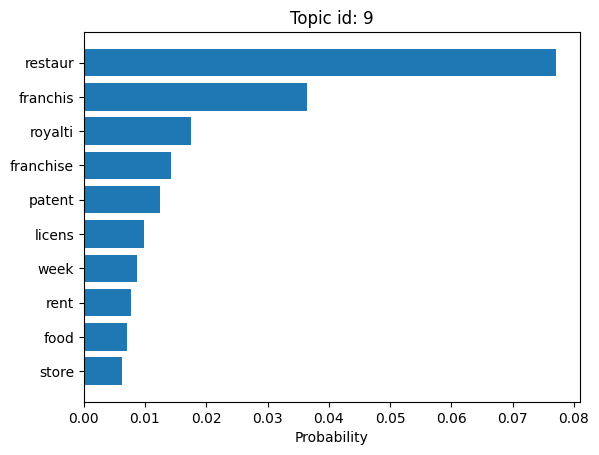

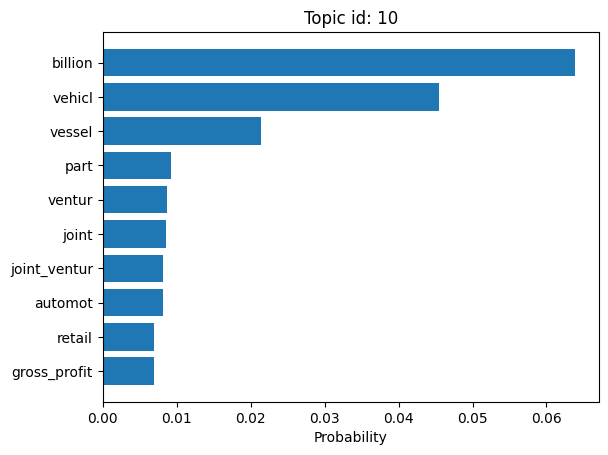

In [6]:
plot_topics(models['7'], num_topics=10, topn=10)

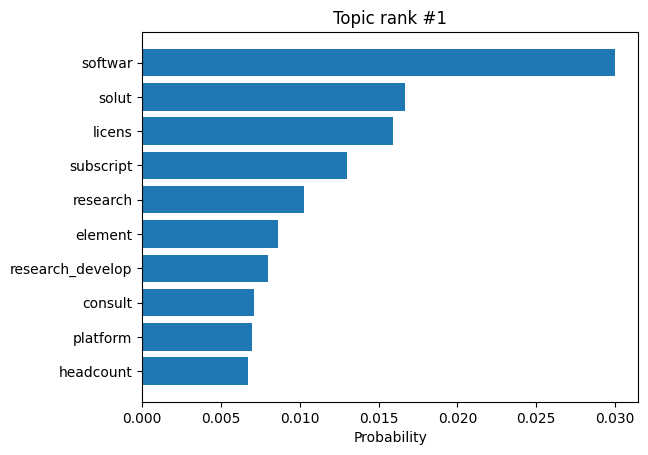

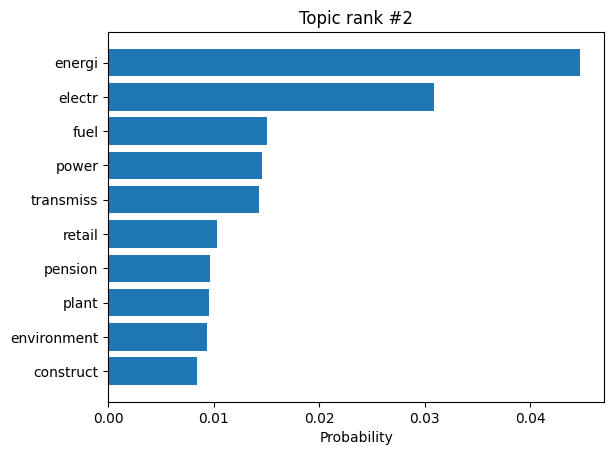

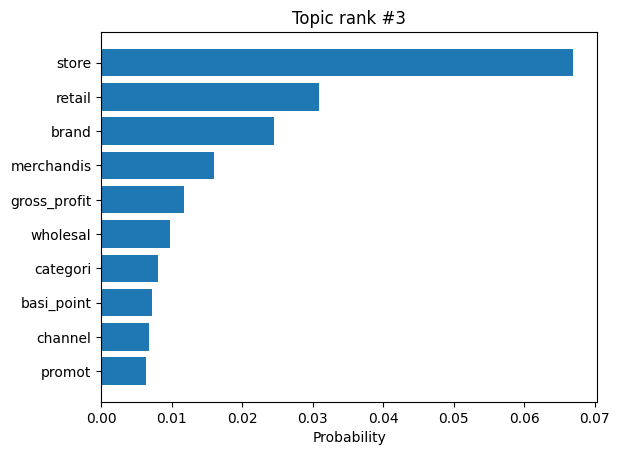

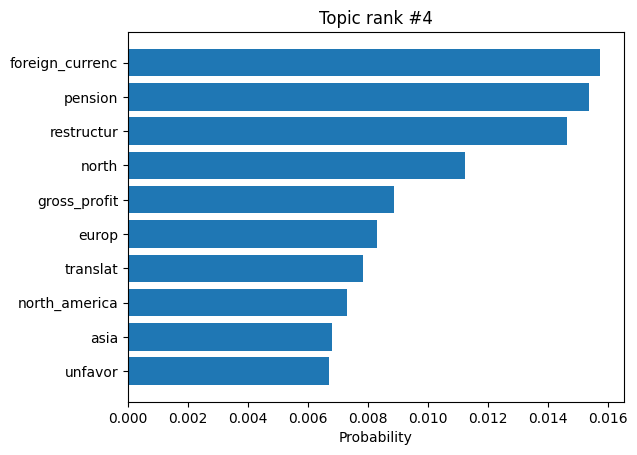

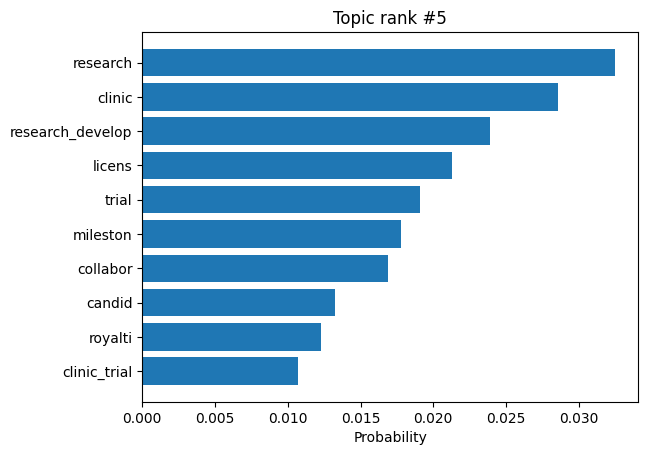

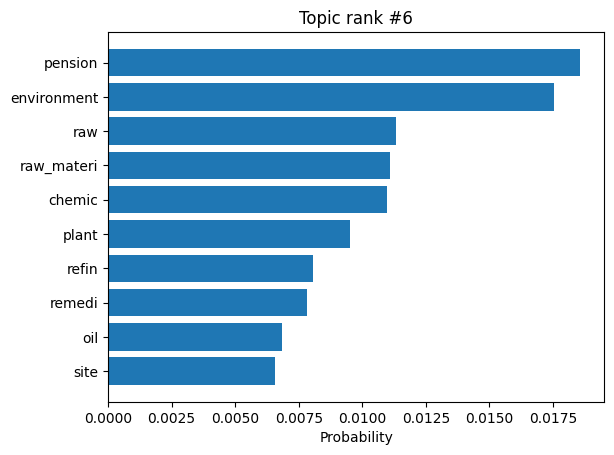

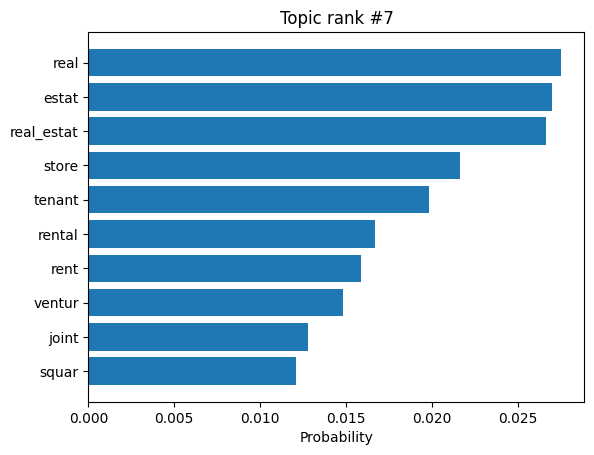

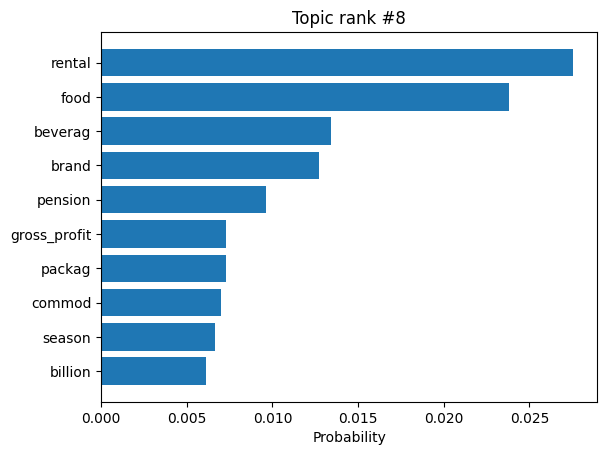

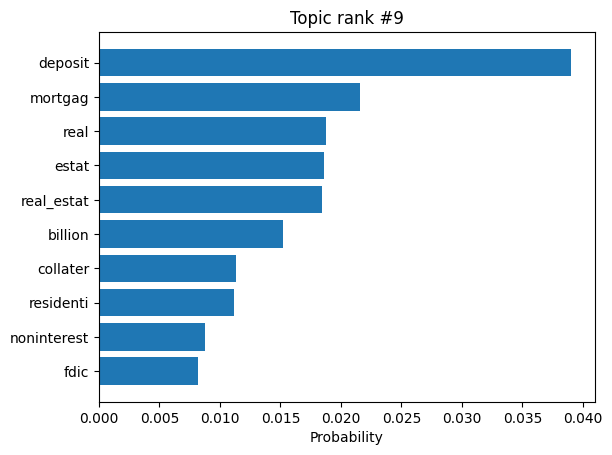

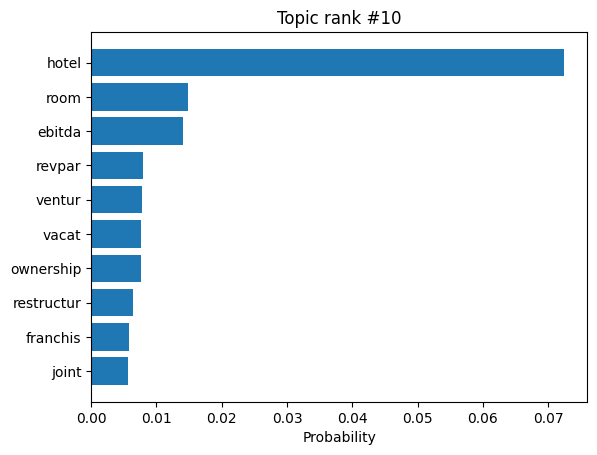

In [6]:
plot_topics(models['7'], corpus['7'])